# (Ford GoBike System Data Visualization)
## by (Ebtihal Alkhalifah)

## Investigation Overview

> In this projectinvestigation, I wanted to look at the the bikers trip duration and when they take bikes during the week, and what hour, and what's their gender and membership type is. 

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Change the types of data
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)
bikes.start_station_id = bikes.start_station_id.astype(str)
bikes.end_station_id = bikes.end_station_id.astype(str)
bikes.bike_id = bikes.bike_id.astype(str)
bikes.member_gender = bikes.member_gender.astype('category')
bikes.user_type = bikes.user_type.astype('category')
#Calculate age
bikes['member_age']= 2019 - bikes.member_birth_year
# keep only inder 70s
bikes['member_age_above70'] = bikes['member_age']>70
#convert sec to min
bikes['duration_minute'] = round((bikes['duration_sec'] / 60).astype(float))
#Show weekdays
bikes['start_weekday_num'] = bikes['start_time'].apply(lambda time: time.dayofweek)
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikes['weekday'] = bikes['start_weekday_num'].map(daymap)
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
bikes.weekday = pd.Categorical(bikes.weekday, categories= week_order, ordered=True)
#Show hours 
bikes['start_time_hour'] = bikes['start_time'].dt.hour


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Trip duration in min)

The data is not distributed evenly. Most users take 5 to 10 minutes plotted in range from 0 to 30 minutes.

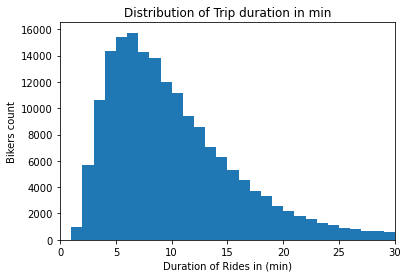

In [4]:

bins = np.arange(0, bikes['duration_minute'].max(), 1)
plt.hist(data = bikes, x = 'duration_minute', bins = bins)
plt.xlim([0,30])
plt.xlabel('Duration of Rides in (min)')
plt.ylabel('Bikers count')
plt.title('Distribution of Trip duration in min')
plt.show()

## (User type and member gender distibution.)

> The bar chart shows that The highest range of users are subscribers and male with almost triple count. 

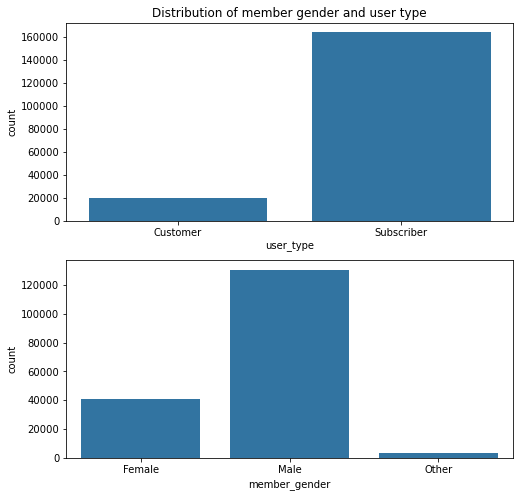

In [5]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = bikes, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = bikes, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_title('Distribution of member gender and user type')
plt.show();

## (Trip duration across weekday and user_type)
> The plot shows that the customers are playing a good rule in making the trip duration longer in weekends.


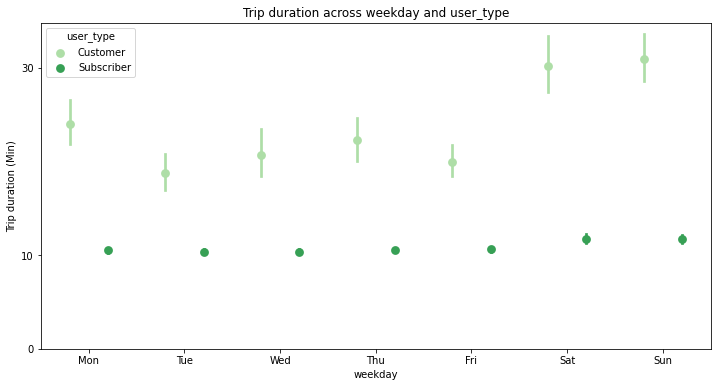

In [6]:
fig, ax = plt.subplots(ncols = 1, figsize = [12,6])
sb.pointplot(data = bikes, x = 'weekday', y = 'duration_minute', hue = 'user_type',
             palette = 'Greens', linestyles = '', dodge = 0.4)
ax.set_title('Trip duration across weekday and user_type')
ax.set_ylabel('Trip duration (Min)')
ax.set_yticks([0, 10, 30])
ax.set_yticklabels(['0', '10', '30'])
ax.set_yticklabels([],minor = True)
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [8]:
# I tried many ways to solve the problem of extracting HTML file for the slides with the hidden code feature but it keeps giving me eror msgs.
#1- I installed the reveal.js
#2-Uninstalling and re install nbconvert.
#3- Creating new notebook and working on it. 
#4- place "!" in begginning of below line.
#All ended with errors

!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 629225 bytes to slide_deck_template.slides.html
[NbConvertApp] Serving local reveal.js
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
